## Importing Libraries

In [9]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [10]:
df = pd.read_csv("C:/Workspace/Projects/Insurance premium prediction/artifacts/raw_data.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [11]:
x = df.drop(columns=["expenses"], axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [12]:
y = df["expenses"]
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [14]:
num_cols = [col for col in x.columns if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in x.columns if df[col].dtype == 'object']

print(f"Numerical Columns : {num_cols}")
print(f"Categorical Columns : {cat_cols}")

Numerical Columns : ['age', 'bmi', 'children']
Categorical Columns : ['sex', 'smoker', 'region']


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_cols),
         ("StandardScaler", numeric_transformer, num_cols),        
    ]
)

In [16]:
x = preprocessor.fit_transform(x)

In [17]:
x.shape

(1338, 11)

In [18]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((1070, 11), (268, 11))

#### Create an Evaluate Function to give all metrics after model Training

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6105.2451
- Mean Absolute Error: 4207.9766
- R2 Score: 0.7418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5796.5563
- Mean Absolute Error: 4181.5615
- R2 Score: 0.7836


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.2476
- Mean Absolute Error: 4208.0337
- R2 Score: 0.7418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5797.2951
- Mean Absolute Error: 4182.3918
- R2 Score: 0.7835


Ridge
Model performance for Training set
- Root Mean Squared Error: 6105.3089
- Mean Absolute Error: 4212.3760
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5798.5673
- Mean Absolute Error: 4187.2631
- R2 Score: 0.7834


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4770.4644
- Mean Absolute Error: 2857.6957


In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.866221
5,Random Forest Regressor,0.856049
6,XGBRegressor,0.838607
8,AdaBoost Regressor,0.832754
0,Linear Regression,0.783573
1,Lasso,0.783518
2,Ridge,0.783422
3,K-Neighbors Regressor,0.768453
4,Decision Tree,0.719213


# CatBoostRegressor

In [23]:
cbreg = CatBoostRegressor()
cbreg = cbreg.fit(x_train, y_train)
y_pred = cbreg.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.041383
0:	learn: 11666.7956770	total: 2.82ms	remaining: 2.82s
1:	learn: 11302.9655201	total: 3.68ms	remaining: 1.84s
2:	learn: 10982.1649269	total: 5.46ms	remaining: 1.81s
3:	learn: 10652.5442888	total: 10.4ms	remaining: 2.59s
4:	learn: 10357.8626226	total: 16.7ms	remaining: 3.33s
5:	learn: 10071.9182175	total: 18.5ms	remaining: 3.06s
6:	learn: 9782.2656581	total: 23.4ms	remaining: 3.32s
7:	learn: 9500.0818166	total: 25ms	remaining: 3.1s
8:	learn: 9235.1239522	total: 26.9ms	remaining: 2.97s
9:	learn: 8993.5008688	total: 27.7ms	remaining: 2.75s
10:	learn: 8744.9014374	total: 29.2ms	remaining: 2.63s
11:	learn: 8544.3317669	total: 30.7ms	remaining: 2.53s
12:	learn: 8336.0534823	total: 32.5ms	remaining: 2.47s
13:	learn: 8168.8106898	total: 34.4ms	remaining: 2.42s
14:	learn: 7979.1965182	total: 35.8ms	remaining: 2.35s
15:	learn: 7793.5898711	total: 37.6ms	remaining: 2.31s
16:	learn: 7622.6328063	total: 39.5ms	remaining: 2.28s
17:	learn: 7459.8166117	total: 41.2ms	rema

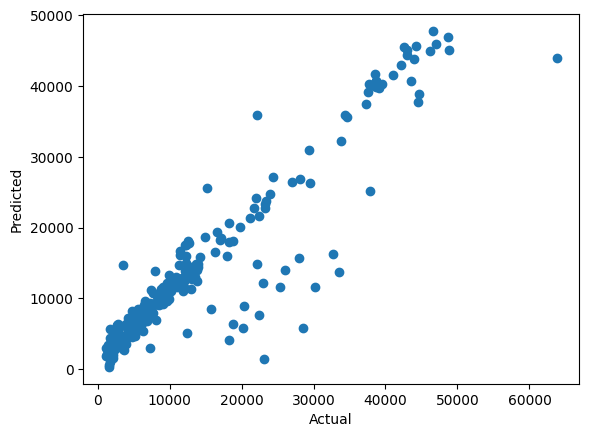

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='expenses'>

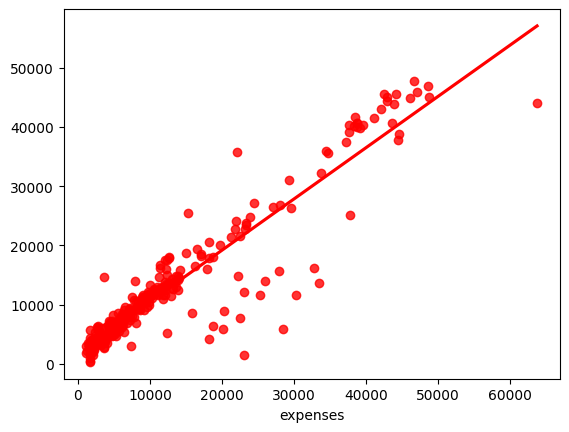

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [27]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.07,11599.927875,-2504.857875
887,5272.18,5641.374327,-369.194327
890,29330.98,31008.440104,-1677.460104
1293,9301.89,11450.596895,-2148.706895
259,33750.29,32183.268245,1567.021755
...,...,...,...
109,47055.53,45962.704869,1092.825131
575,12222.90,13502.210143,-1279.310143
535,6067.13,6221.519141,-154.389141
543,63770.43,43967.526148,19802.903852
